In [4]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

sns.set_theme('paper', font_scale=1.35, style='whitegrid', rc={"axes.titlesize": 18, "axes.labelsize": 16,})


/tmp/ipykernel_45984/3359687676.py:24: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), size=18)
/tmp/ipykernel_45984/3359687676.py:25: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_yticklabels(ax.get_yticklabels(), size=18, weight='bold')


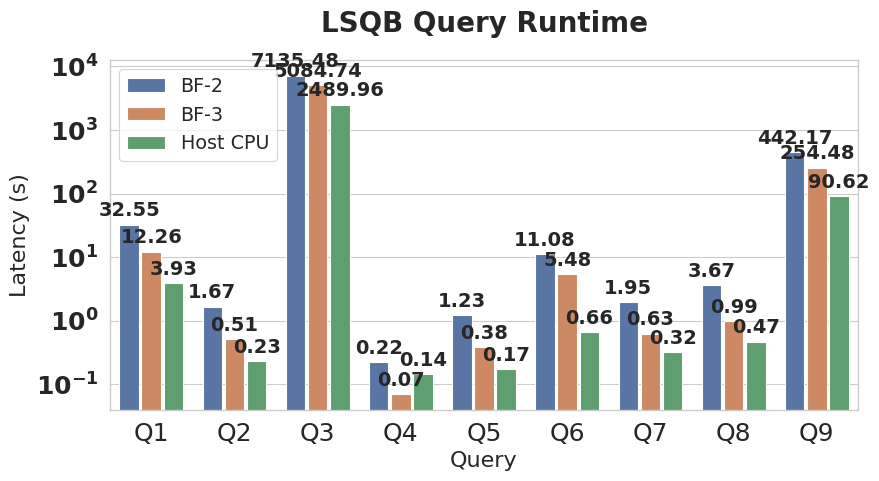

In [23]:
# GraphDB End-to-End benchmark

x_name = 'Query'
x_val = ['Q1', 'Q2', 'Q3', 'Q4', 'Q5', 'Q6', 'Q7', 'Q8', 'Q9']
y_name = 'Latency (s)'

var_name = 'DPU'

# LSQB results
bf3_vals = np.array([12.262,0.5125,5084.7429,0.0707,0.3836,5.4763,0.631,0.992,254.4766])
host_vals = np.array([3.9269,0.2332,2489.9627,0.144,0.1719,0.6607,0.3236,0.4725,90.6188])
bf2_vals = np.array([32.5503,1.6671,7135.4835,0.2227,1.2263,11.0768,1.9454,3.6712,442.1727])

raw_data = pd.DataFrame.from_dict({x_name: x_val, 'BF-2': bf2_vals, 'BF-3': bf3_vals, 'Host CPU': host_vals})
data = pd.melt(raw_data, id_vars=x_name, value_name=y_name, var_name=var_name)

plt.figure(figsize=(9, 5))
ax = sns.barplot(data=data, x=x_name, y=y_name, hue=var_name, gap=0.12)
# display the value on top of the bar
for p in ax.patches:
    if p.get_height() > 0:
        ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 10), textcoords='offset points', size=14, weight='bold')
# ax.set_yscale("log")
ax.set_xticklabels(ax.get_xticklabels(), size=18)
ax.set_yticklabels(ax.get_yticklabels(), size=18, weight='bold')
ax.set_title('LSQB Query Runtime', size=20, weight='bold', pad=20)
plt.yscale('log')
plt.legend(fontsize=13.8, loc='upper left',)
plt.tight_layout()
# plt.show()

plt.savefig('GraphDB-results.pdf')